<a href="https://colab.research.google.com/github/jaimegarciasdr9/module_structure/blob/main/segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.- IMPORT LIBRARIES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # IMPORT THE NORMLIZER
import matplotlib.pyplot as plt

#1.- IMPORT DATA

In [6]:
# Specify the path to the Excel file
excel_file_path = '/content/Bddatos.caso1.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Display the first few rows of the DataFrame
df.head()

,Edad,Sexo,Ingresos Anuales (en miles de euros),Frecuencia Deporte,Comer Fuera Durante Semana,Comer Fuera los Fines de Semana,Cenar Fuera Durante Semana,Cenar Fuera los Fines de Semana,Cena Solo Durante Semana,Cena Solo los Fines de Semana
0,30,M,40,4,4,3,2,2,1,1
1,25,F,35,5,5,4,3,3,2,2
2,45,M,60,3,3,2,1,1,1,1
3,35,F,45,4,4,3,2,2,2,2
4,40,M,55,5,5,4,3,3,1,1


In [7]:
# column names
column_names=df.columns
print(column_names)

Index(['Edad', 'Sexo', 'Ingresos Anuales (en miles de euros)',
       'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana'],
      dtype='object')


#2.- ETL: DATA NORMALISATION AND EXTRACTION

In [8]:
# Select the columns you want to normalize
columns_to_normalize = ['Edad', 'Ingresos Anuales (en miles de euros)', 'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana']
# Initialize the Standard Scaler
scaler = StandardScaler()

# Compute mean and standard deviation for the selected columns
mean = df[columns_to_normalize].mean()
std = df[columns_to_normalize].std()
mean_list=mean.tolist()
std_list=std.tolist()

# Normalize the selected columns using mean and standard deviation
df[columns_to_normalize] = (df[columns_to_normalize] - mean) / std


In [10]:
# Extract multiple columns using a list of column names
selected_columns = df[['Edad', 'Ingresos Anuales (en miles de euros)', 'Frecuencia Deporte', 'Comer Fuera Durante Semana',
       'Comer Fuera los Fines de Semana', 'Cenar Fuera Durante Semana',
       'Cenar Fuera los Fines de Semana', 'Cena Solo Durante Semana',
       'Cena Solo los Fines de Semana']]  # Extracts
selected_columns.head()

,Edad,Ingresos Anuales (en miles de euros),Frecuencia Deporte,Comer Fuera Durante Semana,Comer Fuera los Fines de Semana,Cenar Fuera Durante Semana,Cenar Fuera los Fines de Semana,Cena Solo Durante Semana,Cena Solo los Fines de Semana
0,-1.072580,-1.047504,0.000000,0.000000,0.000000,0.000000,0.000000,-0.987421,-0.987421
1,-1.685483,-1.471594,1.396424,1.396424,1.396424,1.396424,1.396424,0.987421,0.987421
2,0.766129,0.648859,-1.396424,-1.396424,-1.396424,-1.396424,-1.396424,-0.987421,-0.987421
3,-0.459677,-0.623413,0.000000,0.000000,0.000000,0.000000,0.000000,0.987421,0.987421
4,0.153226,0.224768,1.396424,1.396424,1.396424,1.396424,1.396424,-0.987421,-0.987421


# 3.-K-MEANS ( CLUSTERING)

2.1_ error calculation

Error calculation

In [11]:
def cal_kmeans_error (data, k):
  # Initialize the KMeans model
  kmeans = KMeans(n_clusters=k, n_init=10)
  # Fit the model to the DataFrame
  kmeans.fit(data)
  # Calculate the inertia (error)
  error = kmeans.inertia_
  return error

In [12]:
cal_kmeans_error(selected_columns,3) # is an example

32.543673589354405

2.2 Error calculation for differente Ks. Elbow rule

In [13]:
re_list=[]
k_list=[]
# Print the return of the function
print('Results for different k values:')
for k in range(2,10):
    result=cal_kmeans_error(selected_columns,k)
    print("error with K=",k,":", result)
    re_list.append(result) # Append the result to the list
    k_list.append(k) # Append the result to the list

Results for different k values:
error with K= 2 : 154.17756657375017
error with K= 3 : 32.543673589354405
error with K= 4 : 21.946806574373557
error with K= 5 : 14.35059214670503
error with K= 6 : 9.138025866695383
error with K= 7 : 6.178294426736095
error with K= 8 : 4.299977806348341
error with K= 9 : 2.971922765623159


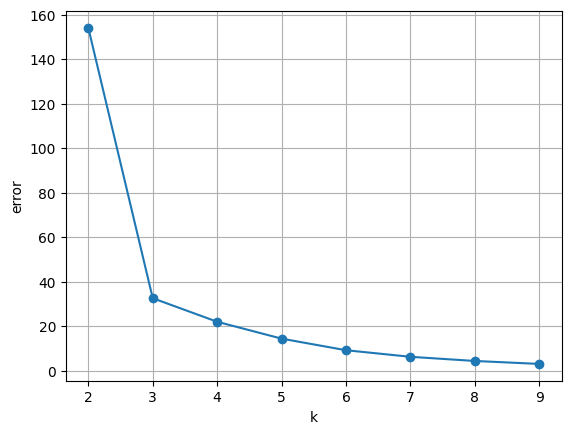

In [14]:
# Create a plot
plt.plot(k_list,re_list,marker='o', linestyle='-')

# Set axis labels
plt.xlabel('k')
plt.ylabel('error')
plt.grid(True)
# Show the plot
plt.show()

#3.- Calculate centroids and interpret them

In [15]:
def cal_kmeans_centroids (data, k):
  # Initialize the KMeans model
  kmeans = KMeans(n_clusters=k, n_init=10)
  # Fit the model to the DataFrame
  kmeans.fit(data)
  # Get the cluster centers (centroids)
  centroids = kmeans.cluster_centers_
  # Calculate the inertia (error)
  return centroids

In [16]:
kbest=4 # select or modify the best K
centroids_best_K=cal_kmeans_centroids(selected_columns,kbest)
print("the centroids for",kbest,":\n", centroids_best_K)

the centroids for 4 :
 [[-0.74774174 -0.78032662  0.          0.          0.          0.
   0.          0.88867879  0.88867879]
 [ 1.23193516  1.24258532 -1.396424   -1.396424   -1.396424   -1.396424
  -1.396424   -0.98742088 -0.98742088]
 [ 0.4801074   0.51691926  1.396424    1.396424    1.396424    1.396424
   1.396424   -0.98742088 -0.98742088]
 [-1.68548342 -1.47159422  1.396424    1.396424    1.396424    1.396424
   1.396424    0.98742088  0.98742088]]


In [17]:
# Create a DataFrame
column_names_centroids=column_names[2:]
df_centroids = pd.DataFrame(centroids_best_K)
# Define column names
df_centroids.columns=columns_to_normalize
# Print the DataFrame
styled_df_centroids = df_centroids.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey'), ('color', 'black')]},
    {'selector': 'tbody', 'props': [('font-size', '14px')]}
])

display(styled_df_centroids )

,Edad,Ingresos Anuales (en miles de euros),Frecuencia Deporte,Comer Fuera Durante Semana,Comer Fuera los Fines de Semana,Cenar Fuera Durante Semana,Cenar Fuera los Fines de Semana,Cena Solo Durante Semana,Cena Solo los Fines de Semana
0,-0.747742,-0.780327,0.000000,0.000000,0.000000,0.000000,0.000000,0.888679,0.888679
1,1.231935,1.242585,-1.396424,-1.396424,-1.396424,-1.396424,-1.396424,-0.987421,-0.987421
2,0.480107,0.516919,1.396424,1.396424,1.396424,1.396424,1.396424,-0.987421,-0.987421
3,-1.685483,-1.471594,1.396424,1.396424,1.396424,1.396424,1.396424,0.987421,0.987421
